In [2]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [3]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [4]:
from openai import OpenAI
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
api_key = os.environ.get("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

In [ ]:
data = pd.read_excel("Football Data (2).xlsx")
print(data.head())
data['Pass Accuracy'] = data['Pass Accuracy'] * 100
print(data['Pass Accuracy'])

     Team Name                                              Squad  \
0      Arsenal  Cedric Soares, Gabriel Magalhães, Mohamed Elne...   
1  Aston Villa  Leon Bailey, Emiliano Buendia, Matthew Cash, C...   
2  Bournemouth  Maximillian Aarons, Tyler Adams, Philip Billin...   
3    Brentford  Kristoffer Ajer, Ellery Balcombe, Shandon Bapt...   
4     Brighton  Mahmoud Dahoud, Igor Julio, Lewis Dunk, Billy ...   

            Manager Formation               Tactical Approach  \
0      Mikel Arteta     4-3-3   High pressing, attacking play   
1        Unai Emery   4-2-3-1               Counter-attacking   
2     Andoni Iraola   4-2-3-1  Direct play, quick transitions   
3      Thomas Frank     4-3-3   Set-pieces, counter-attacking   
4  Roberto De Zerbi   4-2-3-1  Possession-based, fluid attack   

                   Top Scorer                 Top Playmaker  \
0      Bukayo Saka (16 goals)  Martin Ødegaard (10 assists)   
1    Ollie Watkins (19 goals)    Ollie Watkins (13 assists)   
2  Do

In [ ]:
def generate_base_prompt():
  team_data_1 = data[data['Team Name'] == "Manchester City"].iloc[0]
  team_name = team_data_1['Team Name']
  formation = team_data_1['Formation']
  manager = team_data_1['Manager']
  squad = team_data_1['Squad']
  tactical_approach = team_data_1['Tactical Approach']
  top_scorer = team_data_1['Top Scorer']
  top_playmaker = team_data_1['Top Playmaker']
  key_defender = team_data_1['Key Defender']
  goals_conceded = team_data_1['Goals Conceded']
  clean_sheets = team_data_1['Clean Sheets']
  wins = team_data_1['Wins']
  draws = team_data_1['Draws']
  losses = team_data_1['Losses']
  points = team_data_1['Points']
  possession_percentage = team_data_1['Possession Percentage']
  pass_accuracy = team_data_1['Pass Accuracy']
  SoT_per90 = team_data_1['Shots on Target / 90']
  switches_per90 = team_data_1['Switches / 90']
  crosses_per90 = team_data_1['Crosses / 90']
  G_xg = team_data_1['G-xG']
  tackles_att3rd = team_data_1['Tackles in attacking 3rd']
  xG = team_data_1['xG']
  xAG = team_data_1['xAG']
  npxG = team_data_1['npxG']
  goals = team_data_1['Gls']
  assists = team_data_1['Ast']
  goals_per90 = team_data_1['Gls/90']
  ast_per90 = team_data_1['Ast/90']
  xG_per90 = team_data_1['xG/90']
  npxG_per90 = team_data_1['npxG/90']
  xAG_per90 = team_data_1['xAG/90']

  team_data_2 = data[data['Team Name'] == "Sheffield United"].iloc[0]
  team_name_2 = team_data_2['Team Name']
  formation_2 = team_data_2['Formation']
  manager_2 = team_data_2['Manager']
  squad_2 = team_data_2['Squad']
  tactical_approach_2 = team_data_2['Tactical Approach']
  top_scorer_2 = team_data_2['Top Scorer']
  top_playmaker_2 = team_data_2['Top Playmaker']
  key_defender_2 = team_data_2['Key Defender']
  goals_conceded_2 = team_data_2['Goals Conceded']
  clean_sheets_2 = team_data_2['Clean Sheets']
  wins_2 = team_data_2['Wins']
  draws_2 = team_data_2['Draws']
  losses_2 = team_data_2['Losses']
  points_2 = team_data_2['Points']
  possession_percentage_2 = team_data_2['Possession Percentage']
  pass_accuracy_2 = team_data_2['Pass Accuracy']
  SoT_per90_2 = team_data_2['Shots on Target / 90']
  switches_per90_2 = team_data_2['Switches / 90']
  crosses_per90_2 = team_data_2['Crosses / 90']
  G_xg_2 = team_data_2['G-xG']
  tackles_att3rd_2 = team_data_2['Tackles in attacking 3rd']
  xG_2 = team_data_2['xG']
  xAG_2 = team_data_2['xAG']
  npxG_2 = team_data_2['npxG']
  goals_2 = team_data_2['Gls']
  assists_2 = team_data_2['Ast']
  goals_per90_2 = team_data_2['Gls/90']
  ast_per90_2 = team_data_2['Ast/90']
  xG_per90_2 = team_data_2['xG/90']
  npxG_per90_2 = team_data_2['npxG/90']
  xAG_per90_2 = team_data_2['xAG/90']

  example_response_attacking = (
      f"{team_name}, coached by {manager}, typically plays in a {formation} formation. The team employs a proactive {tactical_approach} approach. "
      f"The top scorer for the team is {top_scorer}, while {top_playmaker} is the key playmaker, with their high numbers being indicative of their potency in attack."
      f"Defensively, {key_defender} is a standout performer.\n"
      f"In the current season, {team_name}'s combination of few goals conceded ({goals_conceded}), numerous clean sheets ({clean_sheets}), and a high number of tackles in the attacking third ({tackles_att3rd}) indicates the team is consistently pressing high up the pitch with intensity. This proactive defensive strategy has proven effective in stifling opponents' attacks."
      f"The team has {wins} wins, {draws} draws, and {losses} losses, accumulating {points} points.\n"
      f"Possession-wise, the team holds an average of {possession_percentage}% with a pass accuracy of {pass_accuracy} and, on average, they manage {SoT_per90} shots on target per 90 minutes. Collectively, The high values of these markers suggest an elite possession-based team which aims to dominate the game by playing in the opponents' half."
      f"On average, they manage a high {switches_per90} switches per 90 minutes potentially indicating an assymetric positioning of their players with an overload on one side. Also, {team_name} averages a high {crosses_per90} crosses per 90 minutes indicating their ability to go direct and mix up their play which makes them unpredictable."
      f"{team_name} has the highest Goals - xG (G-xG) is {G_xg}, indicating their supreme finishing efficiency.\n"
      f"Advanced metrics show that they reign supreme in attack with {xG} expected goals (xG), "
      f"{xAG} expected assists (xAG), and {npxG} non-penalty expected goals (npxG).\n"
      f"The team has scored {goals} goals and provided {assists} assists, averaging {goals_per90} goals per 90 minutes and {ast_per90} assists per 90 minutes. "
      f"Other per 90 statistics include {xG_per90} xG, {npxG_per90} non-penalty xG, and {xAG_per90} xAG."
    )

  example_response_defensive = (
      f"{team_name_2}, coached by {manager_2}, typically plays in a {formation_2} formation. The team employs a negative {tactical_approach_2} approach. "
      f"The top scorer for the team is {top_scorer_2}, while {top_playmaker_2} is the key playmaker. The low numbers for the top scorer and playmakes suggest the team's poor attacking output."
      f"Defensively, {key_defender_2} is {team_name_2}'s most impressive performer.\n"
      f"In the current season, {team_name_2} has conceded {goals_conceded_2} goals and kept {clean_sheets_2} clean sheets. Statistically, these are the worst numbers in the Premier League 2023/24 season indicating their inability to attack and defend."
      f"The team has {wins_2} wins, {draws_2} draws, and {losses_2} losses, accumulating {points_2} points.\n"
      f"Possession-wise, the team holds an average of {possession_percentage_2}% with a pass accuracy of {pass_accuracy_2}. "
      f"On average, they manage {SoT_per90_2} shots on target per 90 minutes, {switches_per90_2} switches per 90 minutes, "
      f"and {crosses_per90_2} crosses per 90 minutes. The team's Goals - xG (G-xG) is {G_xg_2}, indicating their poor finishing efficiency.\n"
      f"Additionally, they have {tackles_att3rd_2} tackles in the attacking third which is among the top of the competition but significantly lower than the elite. Advanced metrics show {team_name_2} has {xG_2} expected goals (xG), "
      f"{xAG_2} expected assists (xAG), and {npxG_2} non-penalty expected goals (npxG).\n"
      f"The team has scored {goals_2} goals and provided {assists_2} assists, averaging {goals_per90_2} goals per 90 minutes and {ast_per90_2} assists per 90 minutes. "
      f"Other statistics include {xG_per90_2} xG per 90, {npxG_per90_2} non-penalty xG per 90, and {xAG_per90_2} xAG per 90."
    )

  base_prompt = f"""
        You are a chatbot that provides detailed football team analysis from only the Premier League 2023/24 season. If asked about a general overview or a detailed analysis for a single team or multiple teams, your responses should include the team's formation, key players,
        tactical approach, and advanced statistics such as expected goals, expected assists, goals - expected goals, goals, assists, clean sheets, crosses per 90, switches per 90, and so on. Use these statistics to provide insights into
        the team's playing style, strengths, and weaknesses. Note that different formations and metrics can imply different playing styles,
        and should be interpreted in the context of the team's overall tactics.\n\n
        Example:\n
        User: Describe the overall playing style of Manchester City.\n
        Chatbot:\n\n
        f"{example_response_attacking}\n"
        "User: Describe the overall playing style of Sheffield United.\n"
        "Chatbot:\n\n"
        f"{example_response_defensive}\n"
    """
  return base_prompt



In [ ]:
def get_team_data(team_name):
  if team_name in data['Team Name'].values:
    team_data = data[data['Team Name'] == team_name].iloc[0]
    return team_data
  else:
    return None

In [ ]:
def generate_grouped_bar_chart(matched_team_data):
  teams = [team_name for team_name, _ in matched_team_data]
  goals = [team_data['Gls'] for _, team_data in matched_team_data]
  xG = [team_data['xG'] for _, team_data in matched_team_data]

  bar_width = 0.35
  index = pd.RangeIndex(len(teams))

  fig, ax = plt.subplots(figsize=(10,6))
  bar1 = ax.bar(index, goals, bar_width, label='Goals')
  bar2 = ax.bar(index + bar_width, xG, bar_width, label='xG')

  ax.set_xlabel("Teams")
  ax.set_ylabel("Values")
  ax.set_title("Goals vs xG")
  ax.set_xticks(index + bar_width/2)
  ax.set_xticklabels(teams)
  ax.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
import matplotlib.pyplot as plt

def scatter_plot_possession_vs_tackles(teams):
    fig, ax = plt.subplots(figsize=(12, 8))
    horizontal_buffer = 0.5
    vertical_buffer = 0.5

    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    for team in teams:
        team_data = get_team_data(team)
        possession = team_data['Possession Percentage']
        tackles_final_third = team_data['Tackles in attacking 3rd']
        ax.scatter(possession, tackles_final_third, color='lightblue', s=100, alpha=0.7)
        ax.annotate(team, (possession + horizontal_buffer, tackles_final_third + vertical_buffer),
                    color='white', fontsize=10, fontweight='bold')

    ax.set_xlabel("Possession Percentage", color='white', fontsize=12)
    ax.set_ylabel("Tackles in Final Third", color='white', fontsize=12)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    plt.title("Possession vs Tackles in Final Third", color='white', fontsize=16)

    plt.grid(False)

    ax.grid(True, linestyle='--', alpha=0.3, color='gray')

    plt.tight_layout()

    plt.show()

In [ ]:
from math import pi

def spider_chart(matched_team_data):
  desired_metrics = ['Possession Percentage', 'Pass Accuracy', 'xG', 'xAG', 'Tackles in attacking 3rd', 'npxG', 'Ast', 'Gls', 'Points']
  N = len(desired_metrics)

  angles = [n/float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

  fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(polar=True))

  for team_name, team_data in matched_team_data:
    values = [team_data[metric] for metric in desired_metrics]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=team_name)
    ax.fill(angles, values, color='b', alpha=0.1)

  plt.xticks(angles[:-1], desired_metrics, color='grey', size=8)
  plt.title("Attacking Metrics")
  plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
  plt.show()

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def chart_type(query):
  query = query.lower()

  chart_type = {"spider": ["spider", "radar", "web", "attacking metrics", "attacking stats", "attack summary", "offensive metrics", "offensive stats",
                   "xg", "expected goals", "xag", "expected assists", "crosses per 90", "crosses per game", "switches per 90",
                   "switches per game", "possession percentage", "pass accuracy", "pass completion", "attacking performance", "goal attempts",
                   "shot accuracy", "attacking ability", "attacking abilities"],
                 "scatter": ["scatter", "scatter plot", "scatter diagram", "scatter chart", "distribution", "correlation", "relationship", "possession vs tackles",
                    "possession and tackles", "possession percentage vs tackles", "pressing vs possession", "high press vs possession",
                    "data points", "data distribution", "scatter analysis", "x vs y", "coordinate plot", "data correlation", "performance analysis", "pressing intensity", "pressing"],
        "bar": ["bar", "bar plot", "bar chart", "column chart", "column plot", "comparison", "grouped bar", "bar graph", "statistical comparison",
                "metric comparison", "performance comparison", "goals scored", "goals vs xg", "xg vs goals", "goals and xg", "goals", "expected goals",
                "xg", "goals comparison", "xg comparison", "scoring vs expected goals", "visual comparison", "metric visualization", "bar chart comparison",
                "data visualization", "performance metrics", "finishing", "finishing efficiency", "finishing ability"]}

  for chart_type_name, keywords in chart_type.items():
    if any(keyword in query for keyword in keywords):
      return chart_type_name

  best_match = None
  best_ratio = 0

  for chart_type_name, keywords in chart_type.items():
    for keyword in keywords:
      ratio = fuzz.partial_ratio(query, keyword)
      if ratio > best_ratio:
        best_ratio = ratio
        best_match = chart_type_name

  return best_match if best_ratio > 70 else None


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
last_two_teams = []

def generate_response(user_query, messages_history):
    base_prompt = generate_base_prompt()
    global last_two_teams
    matched_team_data = []
    team_data = None

    teams_in_query = [team_name for team_name in data['Team Name'].values if team_name.lower() in user_query.lower()]

    if teams_in_query:
        last_two_teams = teams_in_query[-2:]

    if not teams_in_query:
        if last_two_teams:
            teams_in_query = last_two_teams
        else:
            return "Please specify the team you want to know about."

    for team_name in teams_in_query:
        team_data = get_team_data(team_name)
        if team_data is not None:
            matched_team_data.append((team_name, team_data))

    if not matched_team_data:
        return "Could not find data for the specified team(s). Please check the team names and try again."

    team_info = "Here's the information:\n"
    for team_name, team_data in matched_team_data:
        team_info += f"{team_name}: {team_data.to_dict()}\n"
    team_info += "Please use this data to craft responses inspired by the two example responses provided above."

    query_chart_type = chart_type(user_query)
    chart_message = None
    chart_generated = False

    if query_chart_type == "spider":
        spider_chart(matched_team_data)
        chart_message = "Generated a spider chart for the team(s)'s attacking metrics. Talk about the chart generated and what it conveys about the teams in question."
        chart_generated = True

    elif query_chart_type == "scatter":
        scatter_plot_possession_vs_tackles(data["Team Name"].values)
        chart_message = "Generated a scatter plot for the team(s)'s possession percentage vs their tackles in the attacking 3rd. Talk about the chart generated and what it conveys about the teams in question."
        chart_generated = True

    elif query_chart_type == "bar":
        generate_grouped_bar_chart(matched_team_data)
        chart_message = "Generated a grouped bar chart for the team(s)'s goals and xG. Talk about the chart generated and what it conveys about the teams in question."
        chart_generated = True

    if chart_generated:
        team_info += f"\n\n{chart_message}"

    full_prompt = base_prompt + "\n\n" + team_info + "\n\n" + user_query

    if chart_generated:
        full_prompt += f"\n\nPlease provide a detailed analysis of the {query_chart_type} chart that has been generated, as described above."

    stream = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages_history + [{"role": "user", "content": full_prompt}],
        stream=True
    )

    gpt_content = ""

    print("Bot: ", end="")

    for chunk in stream:
        if chunk.choices[0].delta.content is not None:
            content_delta = chunk.choices[0].delta.content
            gpt_content += content_delta
            print(content_delta, end="")

    return gpt_content


User: Hello
User: Describe the attacking ability of Arsenal and Manchester City.


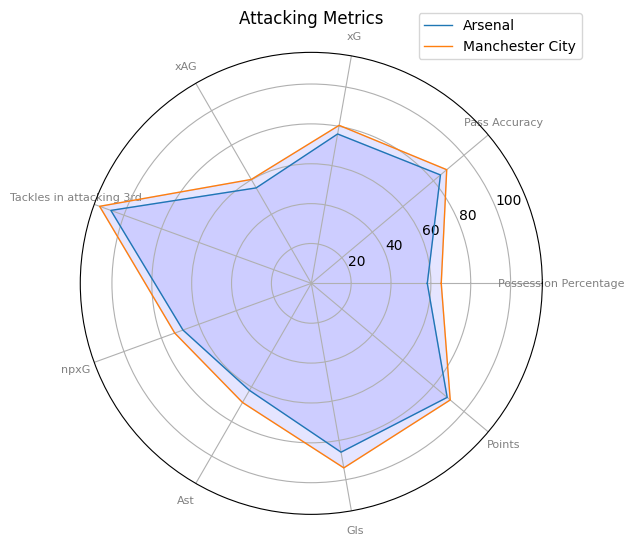

Bot: Arsenal, managed by Mikel Arteta, operates primarily in a 4-3-3 formation, focusing on high pressing and attacking play. The Gunners have been particularly effective this season, with Bukayo Saka leading as the top scorer with 16 goals and Martin Ødegaard acting as the chief playmaker, contributing another 10 assists. Their attacking prowess is supported by strong defensive metrics, including 18 clean sheets and only 29 goals conceded.

In the current season, Arsenal has scored a total of 86 goals, which translates to an impressive 2.26 goals per 90 minutes. They boast a solid expected goals (xG) tally of 76.1, indicating their ability to create high-quality scoring opportunities, while the Goals - expected goals (G-xG) metric stands at 9.9, showing decent finishing efficiency. They also have a high number of assists (62) and a good average of 1.63 assists per 90 minutes.

Positional statistics reveal that Arsenal maintains an average possession of 58.2%, with a pass accuracy of 8

In [ ]:
messages = [{
  "role": "system",
  "content": "You are a friendly and knowledgeable chatbot that provides detailed football team analysis for the Premier League 2023/24 season. Engage in polite conversation with the user, responding appropriately to greetings and casual queries. For team analysis:\n- If asked about a potential match between two teams, include relevant statistics for both teams and their key players. Analyze how their tactical matchup might unfold.\n- Include these sections as appropriate only when asked about a complete overview or analysis of team(s): 'Key Players and Statistics', 'Most Used Formation', 'Attacking Ideas', 'Defensive Strategy', 'Offensive Strategy', 'Tactical Flexibility', and 'Performance Trends'.\n- Focus only on the metrics that are relevant to the user's query.\n -Conclude with a dense summary encompassing all salient points from the previous sections.\n- For player battles, use the updated squads provided to generate accurate responses.\n\nWhen charts/plots/distributions are mentioned:\n- Do not state that you cannot generate charts.\n- Assume the charts have been generated and describe the actual data and insights they reveal.\n- For bar graphs, access the data only for the metrics 'Gls' and 'xG' for the teams in question, focusing on these metrics and analysing their implications. Comment on the actual appearance of the bar graph and provide insights only for these metrics.\n- For scatter plots, access data for all Premier League teams using the metrics 'Possession percentage' on the x-axis and 'Tackles in the Final third' on the y-axis. Comment on the actual distribution of teams and provide insights on these metrics.\n- For spider charts, assume the chart has been generated and describe the chart by accessing the data only for the following metrics: 'xG', 'xAG', 'Ast', 'Gls', 'Points', 'npxG', 'Pass Accuracy', 'Possession Percentage', 'Tackles in attacking 3rd'.\n- Always focus on discussing the actual insights from these visualizations, ensuring to provide an analytical commentary based on the data.\n- If the user query involves specific teams (e.g., Arsenal and Manchester City), analyze the generated chart data focusing on the metrics highlighted in the chart specifically for those teams. Otherwise, discuss the chart's data and insights in the context of all Premier League teams generally.\n\nWhen the user asks for specific information regarding teams, focus the response on the specific metrics relevant to the user query, avoiding irrelevant details or a complete summary of all metrics. \n\n When an assistant message is provided to you saying that a chart has been generated, you are commanded to describe the chart that has been generated. \n\nAlways maintain a conversational tone and be ready to clarify or expand on any point if the user asks. If the user's query is unclear or lacks specific details, politely ask for clarification to provide the most accurate and helpful response.\n\nRemember to respond to all types of messages, including simple greetings like 'Hello' or 'Hi', with an appropriate and friendly reply before moving on to football-related topics if applicable."
}]


try:
  while True:

    user_input = input("User: ")

    if len(user_input) == 0:
      break

    messages.append({"role": "user", "content": user_input})
    response = generate_response(user_input, messages)
    messages.append({"role": "assistant", "content": response})

except KeyboardInterrupt:
  pass

In [ ]:
# @title Install streamlit and localtunnel
!pip install -q streamlit
!npm install localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00

added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
%%writefile app.py
import streamlit as st
from openai import OpenAI
import matplotlib.pyplot as plt
import pandas as pd
import io
from math import pi
import seaborn as sns
import numpy as np
from fuzzywuzzy import fuzz

api_key = os.environ.get("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

data = pd.read_excel('Football Data (2).xlsx')
data['Pass Accuracy'] = data['Pass Accuracy'] * 100


def generate_base_prompt():
  team_data_1 = data[data['Team Name'] == "Manchester City"].iloc[0]
  team_name = team_data_1['Team Name']
  formation = team_data_1['Formation']
  manager = team_data_1['Manager']
  squad = team_data_1['Squad']
  tactical_approach = team_data_1['Tactical Approach']
  top_scorer = team_data_1['Top Scorer']
  top_playmaker = team_data_1['Top Playmaker']
  key_defender = team_data_1['Key Defender']
  goals_conceded = team_data_1['Goals Conceded']
  clean_sheets = team_data_1['Clean Sheets']
  wins = team_data_1['Wins']
  draws = team_data_1['Draws']
  losses = team_data_1['Losses']
  points = team_data_1['Points']
  possession_percentage = team_data_1['Possession Percentage']
  pass_accuracy = team_data_1['Pass Accuracy']
  SoT_per90 = team_data_1['Shots on Target / 90']
  switches_per90 = team_data_1['Switches / 90']
  crosses_per90 = team_data_1['Crosses / 90']
  G_xg = team_data_1['G-xG']
  tackles_att3rd = team_data_1['Tackles in attacking 3rd']
  xG = team_data_1['xG']
  xAG = team_data_1['xAG']
  npxG = team_data_1['npxG']
  goals = team_data_1['Gls']
  assists = team_data_1['Ast']
  goals_per90 = team_data_1['Gls/90']
  ast_per90 = team_data_1['Ast/90']
  xG_per90 = team_data_1['xG/90']
  npxG_per90 = team_data_1['npxG/90']
  xAG_per90 = team_data_1['xAG/90']

  team_data_2 = data[data['Team Name'] == "Sheffield United"].iloc[0]
  team_name_2 = team_data_2['Team Name']
  formation_2 = team_data_2['Formation']
  manager_2 = team_data_2['Manager']
  squad_2 = team_data_2['Squad']
  tactical_approach_2 = team_data_2['Tactical Approach']
  top_scorer_2 = team_data_2['Top Scorer']
  top_playmaker_2 = team_data_2['Top Playmaker']
  key_defender_2 = team_data_2['Key Defender']
  goals_conceded_2 = team_data_2['Goals Conceded']
  clean_sheets_2 = team_data_2['Clean Sheets']
  wins_2 = team_data_2['Wins']
  draws_2 = team_data_2['Draws']
  losses_2 = team_data_2['Losses']
  points_2 = team_data_2['Points']
  possession_percentage_2 = team_data_2['Possession Percentage']
  pass_accuracy_2 = team_data_2['Pass Accuracy']
  SoT_per90_2 = team_data_2['Shots on Target / 90']
  switches_per90_2 = team_data_2['Switches / 90']
  crosses_per90_2 = team_data_2['Crosses / 90']
  G_xg_2 = team_data_2['G-xG']
  tackles_att3rd_2 = team_data_2['Tackles in attacking 3rd']
  xG_2 = team_data_2['xG']
  xAG_2 = team_data_2['xAG']
  npxG_2 = team_data_2['npxG']
  goals_2 = team_data_2['Gls']
  assists_2 = team_data_2['Ast']
  goals_per90_2 = team_data_2['Gls/90']
  ast_per90_2 = team_data_2['Ast/90']
  xG_per90_2 = team_data_2['xG/90']
  npxG_per90_2 = team_data_2['npxG/90']
  xAG_per90_2 = team_data_2['xAG/90']

  example_response_attacking = (
      f"{team_name}, coached by {manager}, typically plays in a {formation} formation. The team employs a proactive {tactical_approach} approach. "
      f"The top scorer for the team is {top_scorer}, while {top_playmaker} is the key playmaker, with their high numbers being indicative of their potency in attack."
      f"Defensively, {key_defender} is a standout performer.\n"
      f"In the current season, {team_name}'s combination of few goals conceded ({goals_conceded}), numerous clean sheets ({clean_sheets}), and a high number of tackles in the attacking third ({tackles_att3rd}) indicates the team is consistently pressing high up the pitch with intensity. This proactive defensive strategy has proven effective in stifling opponents' attacks."
      f"The team has {wins} wins, {draws} draws, and {losses} losses, accumulating {points} points.\n"
      f"Possession-wise, the team holds an average of {possession_percentage}% with a pass accuracy of {pass_accuracy} and, on average, they manage {SoT_per90} shots on target per 90 minutes. Collectively, The high values of these markers suggest an elite possession-based team which aims to dominate the game by playing in the opponents' half."
      f"On average, they manage a high {switches_per90} switches per 90 minutes potentially indicating an assymetric positioning of their players with an overload on one side. Also, {team_name} averages a high {crosses_per90} crosses per 90 minutes indicating their ability to go direct and mix up their play which makes them unpredictable."
      f"{team_name} has the highest Goals - xG (G-xG) is {G_xg}, indicating their supreme finishing efficiency.\n"
      f"Advanced metrics show that they reign supreme in attack with {xG} expected goals (xG), "
      f"{xAG} expected assists (xAG), and {npxG} non-penalty expected goals (npxG).\n"
      f"The team has scored {goals} goals and provided {assists} assists, averaging {goals_per90} goals per 90 minutes and {ast_per90} assists per 90 minutes. "
      f"Other per 90 statistics include {xG_per90} xG, {npxG_per90} non-penalty xG, and {xAG_per90} xAG."
    )

  example_response_defensive = (
      f"{team_name_2}, coached by {manager_2}, typically plays in a {formation_2} formation. The team employs a negative {tactical_approach_2} approach. "
      f"The top scorer for the team is {top_scorer_2}, while {top_playmaker_2} is the key playmaker. The low numbers for the top scorer and playmakes suggest the team's poor attacking output."
      f"Defensively, {key_defender_2} is {team_name_2}'s most impressive performer.\n"
      f"In the current season, {team_name_2} has conceded {goals_conceded_2} goals and kept {clean_sheets_2} clean sheets. Statistically, these are the worst numbers in the Premier League 2023/24 season indicating their inability to attack and defend."
      f"The team has {wins_2} wins, {draws_2} draws, and {losses_2} losses, accumulating {points_2} points.\n"
      f"Possession-wise, the team holds an average of {possession_percentage_2}% with a pass accuracy of {pass_accuracy_2}. "
      f"On average, they manage {SoT_per90_2} shots on target per 90 minutes, {switches_per90_2} switches per 90 minutes, "
      f"and {crosses_per90_2} crosses per 90 minutes. The team's Goals - xG (G-xG) is {G_xg_2}, indicating their poor finishing efficiency.\n"
      f"Additionally, they have {tackles_att3rd_2} tackles in the attacking third which is among the top of the competition but significantly lower than the elite. Advanced metrics show {team_name_2} has {xG_2} expected goals (xG), "
      f"{xAG_2} expected assists (xAG), and {npxG_2} non-penalty expected goals (npxG).\n"
      f"The team has scored {goals_2} goals and provided {assists_2} assists, averaging {goals_per90_2} goals per 90 minutes and {ast_per90_2} assists per 90 minutes. "
      f"Other statistics include {xG_per90_2} xG per 90, {npxG_per90_2} non-penalty xG per 90, and {xAG_per90_2} xAG per 90."
    )

  base_prompt = f"""
        You are a chatbot that provides detailed football team analysis from only the Premier League 2023/24 season. If asked about a general overview or a detailed analysis for a single team or multiple teams, your responses should include the team's formation, key players,
        tactical approach, and advanced statistics such as expected goals, expected assists, goals - expected goals, goals, assists, clean sheets, crosses per 90, switches per 90, and so on. Use these statistics to provide insights into
        the team's playing style, strengths, and weaknesses. Note that different formations and metrics can imply different playing styles,
        and should be interpreted in the context of the team's overall tactics.\n\n
        Example:\n
        User: Describe the overall playing style of Manchester City.\n
        Chatbot:\n\n
        f"{example_response_attacking}\n"
        "User: Describe the overall playing style of Sheffield United.\n"
        "Chatbot:\n\n"
        f"{example_response_defensive}\n"
    """
  return base_prompt





def get_team_data(team_name):
  if team_name in data['Team Name'].values:
    team_data = data[data['Team Name'] == team_name].iloc[0]
    return team_data
  else:
    return None





def chart_type(query):
  query = query.lower()

  chart_type = {"spider": ["spider", "radar", "web", "attacking metrics", "attacking stats", "attack summary", "offensive metrics", "offensive stats",
                   "xg", "expected goals", "xag", "expected assists", "crosses per 90", "crosses per game", "switches per 90",
                   "switches per game", "possession percentage", "pass accuracy", "pass completion", "attacking performance", "goal attempts",
                   "shot accuracy", "attacking ability", "attacking abilities"],
                 "scatter": ["scatter", "scatter plot", "scatter diagram", "scatter chart", "distribution", "correlation", "relationship", "possession vs tackles",
                    "possession and tackles", "possession percentage vs tackles", "pressing vs possession", "high press vs possession",
                    "data points", "data distribution", "scatter analysis", "x vs y", "coordinate plot", "data correlation", "performance analysis", "pressing intensity", "pressing"],
        "bar": ["bar", "bar plot", "bar chart", "column chart", "column plot", "comparison", "grouped bar", "bar graph", "statistical comparison",
                "metric comparison", "performance comparison", "goals scored", "goals vs xg", "xg vs goals", "goals and xg", "goals", "expected goals",
                "xg", "goals comparison", "xg comparison", "scoring vs expected goals", "visual comparison", "metric visualization", "bar chart comparison",
                "data visualization", "performance metrics", "finishing", "finishing efficiency", "finishing ability"]}

  for chart_type_name, keywords in chart_type.items():
    if any(keyword in query for keyword in keywords):
      return chart_type_name

  best_match = None
  best_ratio = 0

  for chart_type_name, keywords in chart_type.items():
    for keyword in keywords:
      ratio = fuzz.partial_ratio(query, keyword)
      if ratio > best_ratio:
        best_ratio = ratio
        best_match = chart_type_name

  return best_match if best_ratio > 70 else None





def spider_chart(matched_team_data):
  desired_metrics = ['Possession Percentage', 'Pass Accuracy', 'xG', 'xAG', 'Tackles in attacking 3rd', 'npxG', 'Ast', 'Gls', 'Points']
  N = len(desired_metrics)

  angles = [n/float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

  fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(polar=True))

  for team_name, team_data in matched_team_data:
    values = [team_data[metric] for metric in desired_metrics]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=team_name)
    ax.fill(angles, values, color='b', alpha=0.1)

  plt.xticks(angles[:-1], desired_metrics, color='grey', size=8)
  plt.title("Attacking Metrics")
  plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
  plt.show()





def scatter_plot_possession_vs_tackles(teams):
    fig, ax = plt.subplots(figsize=(12, 8))
    horizontal_buffer = 0.5
    vertical_buffer = 0.5

    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    for team in teams:
        team_data = get_team_data(team)
        possession = team_data['Possession Percentage']
        tackles_final_third = team_data['Tackles in attacking 3rd']
        ax.scatter(possession, tackles_final_third, color='lightblue', s=100, alpha=0.7)
        ax.annotate(team, (possession + horizontal_buffer, tackles_final_third + vertical_buffer),
                    color='white', fontsize=10, fontweight='bold')

    ax.set_xlabel("Possession Percentage", color='white', fontsize=12)
    ax.set_ylabel("Tackles in Final Third", color='white', fontsize=12)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    plt.title("Possession vs Tackles in Final Third", color='white', fontsize=16)

    plt.grid(False)

    ax.grid(True, linestyle='--', alpha=0.3, color='gray')

    plt.tight_layout()

    plt.show()





def generate_grouped_bar_chart(matched_team_data):
  teams = [team_name for team_name, _ in matched_team_data]
  goals = [team_data['Gls'] for _, team_data in matched_team_data]
  xG = [team_data['xG'] for _, team_data in matched_team_data]

  bar_width = 0.35
  index = pd.RangeIndex(len(teams))

  fig, ax = plt.subplots(figsize=(10,6))
  bar1 = ax.bar(index, goals, bar_width, label='Goals')
  bar2 = ax.bar(index + bar_width, xG, bar_width, label='xG')

  ax.set_xlabel("Teams")
  ax.set_ylabel("Values")
  ax.set_title("Goals vs xG")
  ax.set_xticks(index + bar_width/2)
  ax.set_xticklabels(teams)
  ax.legend()

  plt.tight_layout()
  plt.show()



@st.cache_data
def get_persistent_teams():
  if 'persistent_last_two_teams' not in st.session_state:
    st.session_state.persistent_last_two_teams = []
  return st.session_state.persistent_last_two_teams



def generate_response(user_query, messages_history):
    persistent_last_two_teams = st.session_state.get("persistent_last_two_teams", [])
    base_prompt = generate_base_prompt()
    matched_team_data = []
    team_data = None

    teams_in_query = [team_name for team_name in data['Team Name'].values if team_name.lower() in user_query.lower()]

    if teams_in_query:
        persistent_last_two_teams = list(set(persistent_last_two_teams + teams_in_query))

    st.session_state.persistent_last_two_teams = persistent_last_two_teams

    if len(teams_in_query) > 1:
      teams_to_use = teams_in_query
    else:
      teams_to_use = persistent_last_two_teams

    if not teams_in_query:
        if persistent_last_two_teams:
            teams_in_query = persistent_last_two_teams
        else:
            return ("Hi! It seems like you're asking about a football team, but I couldn't find a specific team in your query. "
                    "Could you please provide the name of the team you're interested in? If you need help, you can ask about team statistics or player information. "
                    "For example, you can say 'Tell me about Manchester City' or 'Give me details on Liverpool'."), matched_team_data, None

    if not teams_to_use:
      if persistent_last_two_teams:
        teams_to_use = persistent_last_two_teams
      else:
        return ("Hi! It seems like you're asking about a football team, but I couldn't find a specific team in your query. "
                    "Could you please provide the name of the team you're interested in? If you need help, you can ask about team statistics or player information. "
                    "For example, you can say 'Tell me about Manchester City' or 'Give me details on Liverpool'."), matched_team_data, None

    for team_name in teams_to_use:
        team_data = get_team_data(team_name)
        if team_data is not None:
            matched_team_data.append((team_name, team_data))

    if not matched_team_data:
        return "Could not find data for the specified team(s). Please check the team names and try again.", matched_team_data, None

    team_info = "Here's the information:\n"
    for team_name, team_data in matched_team_data:
        team_info += f"{team_name}: {team_data.to_dict()}\n"
    team_info += "Please use this data to craft responses inspired by the two example responses provided above."

    query_chart_type = chart_type(user_query)
    chart_message = None
    chart_generated = False

    if query_chart_type == "spider":
        spider_chart(matched_team_data)
        chart_message = "Generated a spider chart for the team(s)'s attacking metrics. Talk about the chart generated and what it conveys about the teams in question."
        chart_generated = True

    elif query_chart_type == "scatter":
        scatter_plot_possession_vs_tackles(data["Team Name"].values)
        chart_message = "Generated a scatter plot for the team(s)'s possession percentage vs their tackles in the attacking 3rd. Talk about the chart generated and what it conveys about the teams in question."
        chart_generated = True

    elif query_chart_type == "bar":
        generate_grouped_bar_chart(matched_team_data)
        chart_message = "Generated a grouped bar chart for the team(s)'s goals and xG. Talk about the chart generated and what it conveys about the teams in question."
        chart_generated = True

    if chart_generated:
        team_info += f"\n\n{chart_message}"

    full_prompt = base_prompt + "\n\n" + team_info + "\n\n" + user_query

    if chart_generated:
        full_prompt += f"\n\nPlease provide a detailed analysis of the {query_chart_type} chart that has been generated, as described above."

    stream = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages_history + [{"role": "user", "content": full_prompt}],
        stream=True
    )

    gpt_content = ""

    print("Bot: ", end="")

    for chunk in stream:
        if chunk.choices[0].delta.content is not None:
            content_delta = chunk.choices[0].delta.content
            gpt_content += content_delta
            print(content_delta, end="")

    return gpt_content, matched_team_data, query_chart_type


st.set_page_config(page_title="Football Analytics Assistant", page_icon="⚽", layout="wide")

st.title("⚽ Football Analytics Assistant")

if "openai_model" not in st.session_state:
    st.session_state["openai_model"] = "gpt-4-turbo"

if "messages" not in st.session_state:
    st.session_state.messages = []


with st.sidebar:
    st.header("Chat History")
    for message in st.session_state.messages:
        if message["role"] == "user":
            st.write(f"**User:** {message['content']}")
        else:
            st.write(f"**Assistant:** {message['content']}")


st.sidebar.header("Select Teams")
teams = data['Team Name'].tolist()
selected_teams = st.sidebar.multiselect("Teams", teams)


st.markdown("## Chat")

for message in st.session_state.messages:
    icon = "👤" if message["role"] == "user" else "🤖"
    with st.chat_message(message["role"]):
        st.markdown(f"{icon} {message['content']}")


if prompt := st.chat_input("Ask for football analytics for teams only in the Premier League 2023/24 season"):
    st.session_state.messages.append({"role": "user", "content": prompt})
    with st.chat_message("user"):
        st.markdown(f"👤 {prompt}")

    with st.chat_message("assistant"):
        response, matched_team_data, query_chart_type = generate_response(prompt, st.session_state.messages)
        if query_chart_type and matched_team_data:
            buf = io.BytesIO()

            if query_chart_type == "spider":
                spider_chart(matched_team_data)
            elif query_chart_type == "scatter":
                scatter_plot_possession_vs_tackles(data["Team Name"].values)
            elif query_chart_type == "bar":
                generate_grouped_bar_chart(matched_team_data)

            plt.savefig(buf, format='png')
            buf.seek(0)
            st.image(buf)
            plt.clf()

        st.markdown(f"🤖 {response}")

        st.session_state.messages.append({"role": "assistant", "content": response})


st.header("Detailed Analysis")
tabs = st.tabs(["Squad"])

with tabs[0]:
    st.write("Squad information for selected teams.")
    if selected_teams:
        for team in selected_teams:
            st.subheader(team)
            squad = data[data['Team Name'] == team]['Squad']
            st.write("Players:")
            for player in squad:
                st.write(f"- {player}")
    else:
        st.write("No teams selected. Please select a team from the sidebar.")

Writing app.py


In [ ]:
!pip install -q streamlit openai matplotlib pandas pyngrok fuzzywuzzy numpy seaborn
!npm install localtunnel

ngrok_auth_token = os.environ.get("NGROK_AUTH_TOKEN")

!ngrok authtoken {ngrok_auth_token}

!streamlit run app.py &>/content/logs.txt &

from pyngrok import ngrok

public_url = ngrok.connect(8501)
print(f'Public URL: {public_url}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00

up to date, audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://1b23-34-45-197-255.ngrok-free.app" -> "http://localhost:8501"
